In [35]:
import numpy as np # 导入NumPy数学工具箱
import pandas as pd # 导入Pandas数据处理工具箱
#from keras.datasets import mnist #从Keras中导入mnist数据集
#读入训练集和测试集
data = np.load('/Users/mollytsai/电子资源-零基础学机器学习/第1课 机器学习实战/教学用例2 MNIST手写数字识别/代码/mnist.npz')

X_test_image = data['x_test']
X_train_image = data['x_train']
y_train_lable = data['y_train']
y_test_lable = data['y_test']
#(X_train_image, y_train_lable), (X_test_image, y_test_lable) =  data

In [36]:
print ("特征集张量形状：", X_train_image.shape) #用shape方法显示张量的形状
print ("第一个数据样本：\n", X_train_image[0]) #注意Python的索引是从0开始的

特征集张量形状： (60000, 28, 28)
第一个数据样本：
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0

In [37]:
print ("第一个数据样本的标签：", y_train_lable[0])

第一个数据样本的标签： 5


In [38]:
from tensorflow.keras.utils import to_categorical # 导入keras.utils工具箱的类别转换工具
X_train = X_train_image.reshape(60000,28,28,1) # 给标签增加一个维度
X_test = X_test_image.reshape(10000,28,28,1) # 给标签增加一个维度
y_train = to_categorical(y_train_lable, 10) # 特征转换为one-hot编码
y_test = to_categorical(y_test_lable, 10) # 特征转换为one-hot编码
print ("数据集张量形状：", X_train.shape) # 特征集张量的形状
print ("第一个数据标签：",y_train[0]) # 显示标签集的第一个数据

数据集张量形状： (60000, 28, 28, 1)
第一个数据标签： [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [39]:
from keras import models # 导入Keras模型, 和各种神经网络的层
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = models.Sequential() # 用序贯方式建立模型
model.add(Conv2D(32, (3, 3), activation='relu', # 添加Conv2D层
                 input_shape=(28,28,1))) # 指定输入数据样本张量的类型
model.add(MaxPooling2D(pool_size=(2, 2))) # 添加MaxPooling2D层
model.add(Conv2D(64, (3, 3), activation='relu')) # 添加Conv2D层
model.add(MaxPooling2D(pool_size=(2, 2))) # 添加MaxPooling2D层
model.add(Dropout(0.25)) # 添加Dropout层
model.add(Flatten()) # 展平
model.add(Dense(128, activation='relu')) # 添加全连接层
model.add(Dropout(0.5)) # 添加Dropout层
model.add(Dense(10, activation='softmax')) # Softmax分类激活，输出10维分类码
# 编译模型
model.compile(optimizer='rmsprop', # 指定优化器
              loss='categorical_crossentropy', # 指定损失函数
              metrics=['accuracy']) # 指定验证过程中的评估指标

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.fit(X_train, y_train, # 指定训练特征集和训练标签集
          validation_split = 0.3, # 部分训练集数据拆分成验证集
          epochs=5, # 训练轮次为5轮
          batch_size=128) # 以128为批量进行训练

Epoch 1/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6874 - loss: 3.2478 - val_accuracy: 0.9577 - val_loss: 0.1465
Epoch 2/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9438 - loss: 0.2109 - val_accuracy: 0.9738 - val_loss: 0.0917
Epoch 3/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9582 - loss: 0.1517 - val_accuracy: 0.9786 - val_loss: 0.0812
Epoch 4/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9678 - loss: 0.1096 - val_accuracy: 0.9802 - val_loss: 0.0810
Epoch 5/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9730 - loss: 0.0969 - val_accuracy: 0.9820 - val_loss: 0.0690


In [41]:
score = model.evaluate(X_test, y_test) # 在测试集上进行模型评估
print('测试集预测准确率:', score[1]) # 打印测试集上的预测准确率

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9797 - loss: 0.0702
测试集预测准确率: 0.9839000105857849


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[5.1947715e-13 7.8010580e-13 4.8933446e-10 1.7041355e-08 6.8397517e-13
 2.9172131e-12 7.8715103e-18 1.0000000e+00 5.0666282e-10 1.8093155e-08] 转换一下格式得到： 7


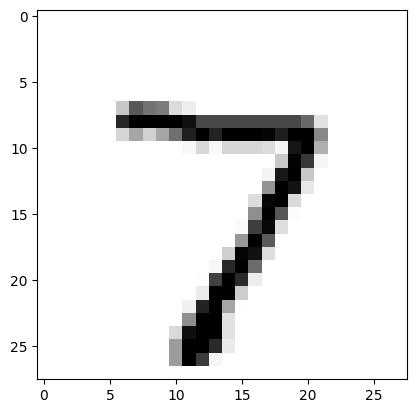

In [42]:
pred = model.predict(X_test[0].reshape(1, 28, 28, 1)) # 预测测试集第一个数据
print(pred[0],"转换一下格式得到：",pred.argmax()) # 把one-hot码转换为数字
import matplotlib.pyplot as plt # 导入绘图工具包
plt.imshow(X_test[0].reshape(28, 28),cmap='Greys') # 输出这个图片